<h1><center>CSCI - 4146 - The Process of Data Science - Summer 2022</h1></center>
<h1><center>Assignment 2</h1></center>

<b>Justin Timmins</b>  
<B00795685>  


### 1. Data Understanding and Feature Engineering<a id='top'></a>

Emphasis: Use this code: Bold: __string__ or **string** Italic: _string_ or *string* <a href='#1'>[1]</a>

In [22]:
import requests
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

#READING IN SPREADSHEET AND CONVERTING TO A DATA FRAME
sheetData = 'https://docs.google.com/spreadsheets/d/1pzyq1-wUfS5Lo4044KM-vOzUGCNkmB9GynNW4PSKK_s/export?format=csv&gid=990980397'
df = pd.read_csv(sheetData)

#FUNCTION USED TO BUILD AND DISPLAY DATA REPORT FOR CONTINUOUS FEATURES(TAKEN FROM TUTORIAL 2)
def build_continuous_features_report(data_df):
    """Build tabular report for continuous features"""
    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }
    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]
    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())
    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)
    return report_df

#FUNCTION USED TO BUILD AND DISPLAY DATA REPORT FOR CATEGORICAL FEATURES(TAKEN FROM TUTORIAL 2)
def build_categorical_features_report(data_df):
    """Build tabular report for categorical features"""
    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list()).T
    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())
    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())
    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )
    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }
    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    continuous_data_df = data_df[cat_feat_names]
    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())
    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)
    return report_df

In [23]:
build_continuous_features_report(df)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
SeniorCitizen,7043,0.000000,2,0.00,0.00,0.162147,0.000,0.0000,1.00,0.368612
MonthlyCharges,7043,0.000000,1585,18.25,35.50,64.761692,70.350,89.8500,118.75,30.090047
TotalCharges,7043,0.156183,6530,18.80,401.45,2283.300441,1397.475,3794.7375,8684.80,2266.771362


In [24]:
build_categorical_features_report(df)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
customerID,7043,0.0,7043,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...",7043,100.000000,[],0,0.000000
gender,7043,0.0,2,[Male],3555,50.475650,[Female],3488,49.524350
Partner,7043,0.0,2,[No],3641,51.696720,[Yes],3402,48.303280
Dependents,7043,0.0,2,[No],4933,70.041176,[Yes],2110,29.958824
PhoneService,7043,0.0,2,[Yes],5016,71.219651,[No],2027,28.780349
InternetService,7043,0.0,3,[Fiber optic],2917,41.417010,[DSL],2708,38.449524
OnlineSecurity,7043,0.0,3,[No],3584,50.887406,[Yes],2041,28.979128
OnlineBackup,7043,0.0,3,[No],3543,50.305268,[Yes],2082,29.561267
DeviceProtection,7043,0.0,3,[No],3518,49.950305,[Yes],2107,29.916229
TechSupport,7043,0.0,3,[No],3547,50.362062,[Yes],2078,29.504473


After analyzing the data quality report I was able to identify a number of data quality issues which may impact our models preformance.

-The first issue being that the 'TotalCharges' feature seems to be missing in a few rows of data. Since it's missing such little data(less then 1%), I decided to completelty remove the the rows with missing information as ommiting about 10 rows will not impact performance when we still have over 7000 to work with.

-Next, I decided to remove the 'customerID' feature as its caridnality is equal to its count so the feature is useless when using the data set for statistical purposes.

-Next, I noticed that the 'Date' feature seemed to have an abonormally high cardinality for being a categorical feature. Therefore, the feature will provide very little insight for us as data scientists so I decided to break the feature up slightly. When thinking about what factors could impact whether a customer opts out of a service, the time they have been subscribed to the service seems like an important factor to account for. To addrress this issue, I decided to to strictly record the year which a customer signed up so I am now dealing with a cardinality of 8 compared to the previous 3346. This will allow me to more accurately determine whether the date a customer joins is relevant to churn.

-Next, I decided convert all the categorical features to continuous values in a seperate data frame. This allows me to perform various calcualations on the data frame which cannot be done with a mix of values.


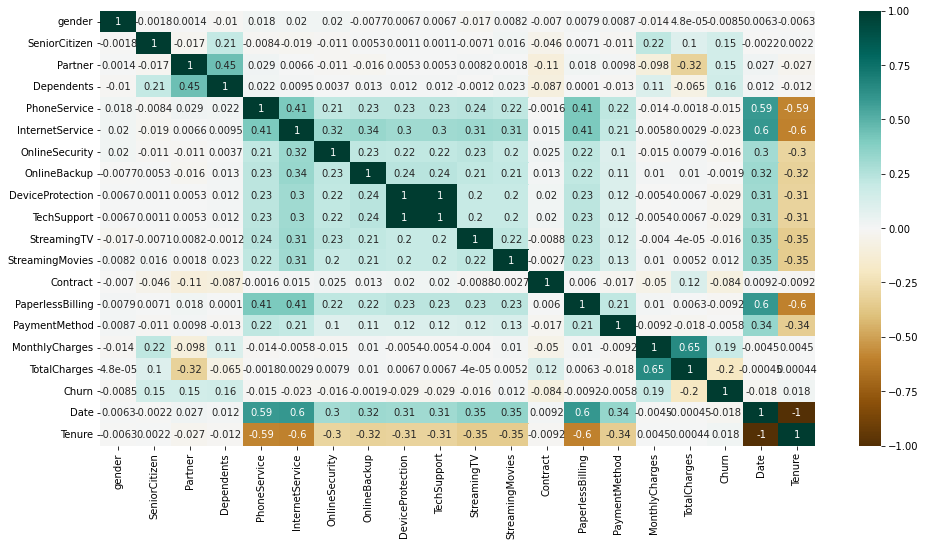

In [25]:
import numpy as np
#REMOVING ALL ROWS WHICH DO NOT HAVE A VALUE FOR 'TotalCharged'
df.dropna(subset=['TotalCharges'], inplace=True)

df = df.drop('customerID', axis=1)

#CREATING A TENURE FEATURE WHICH DISPLAYS AMOUNT OF years SINCE CUSTOMER REGISTERED
#https://stackoverflow.com/questions/61422724/using-python-calculate-an-employee-tenure-with-a-company-x
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)#Converting dates to datetimes
now = pd.Timestamp.now().floor('d')#Todays datetime
df['Tenure'] = ((now - (df['Date']))/ np.timedelta64(1, 'D')).astype(int) / 365#Adding new tenure feature which displays how many days have passed since suctomer created account and conmverting daytime stamp to int


#Creating a copy of the data frame which I will use for analysis after converting categorical features to numerical
dfConverted = df.copy()

#CONVERTING CATEGORICAL FEATURES TO CONTINUOUS
dfConverted['gender'] = pd.factorize(dfConverted['gender'])[0]
dfConverted['Partner'] = pd.factorize(dfConverted['Partner'])[0]
dfConverted['Dependents'] = pd.factorize(dfConverted['Dependents'])[0]
dfConverted['PhoneService'] = pd.factorize(dfConverted['PhoneService'])[0]
dfConverted['InternetService'] = pd.factorize(dfConverted['InternetService'])[0]
dfConverted['OnlineSecurity'] = pd.factorize(dfConverted['OnlineSecurity'])[0]
dfConverted['OnlineBackup'] = pd.factorize(dfConverted['OnlineBackup'])[0]
dfConverted['DeviceProtection'] = pd.factorize(dfConverted['TechSupport'])[0]
dfConverted['TechSupport'] = pd.factorize(dfConverted['TechSupport'])[0]
dfConverted['StreamingTV'] = pd.factorize(dfConverted['StreamingTV'])[0]
dfConverted['StreamingMovies'] = pd.factorize(dfConverted['StreamingMovies'])[0]
dfConverted['Contract'] = pd.factorize(dfConverted['Contract'])[0]
dfConverted['PaperlessBilling'] = pd.factorize(dfConverted['PaperlessBilling'])[0]
dfConverted['PaymentMethod'] = pd.factorize(dfConverted['PaymentMethod'])[0]
dfConverted['Churn'] = pd.factorize(dfConverted['Churn'])[0]
dfConverted['Date'] = pd.factorize(dfConverted['Date'])[0]



#PLOTTING CORRELATION HEATMAP
plt.figure(figsize=(16,8))
varHeatmap = sns.heatmap(dfConverted.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')



In [26]:
build_continuous_features_report(df)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
SeniorCitizen,7032,0.0,2,0.000000,0.000000,0.162400,0.000000,0.000000,1.000000,0.368844
MonthlyCharges,7032,0.0,1584,18.250000,35.587500,64.798208,70.350000,89.862500,118.750000,30.085974
TotalCharges,7032,0.0,6530,18.800000,401.450000,2283.300441,1397.475000,3794.737500,8684.800000,2266.771362
Tenure,7032,0.0,3344,1.534247,4.272603,6.992753,6.972603,9.712329,12.536986,3.168670


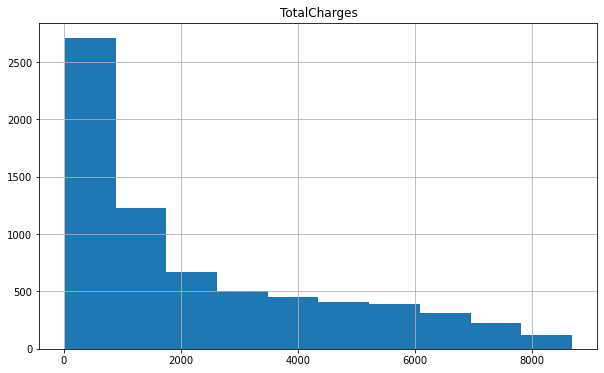

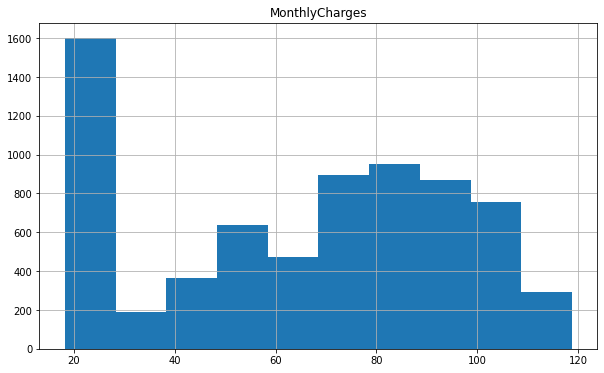

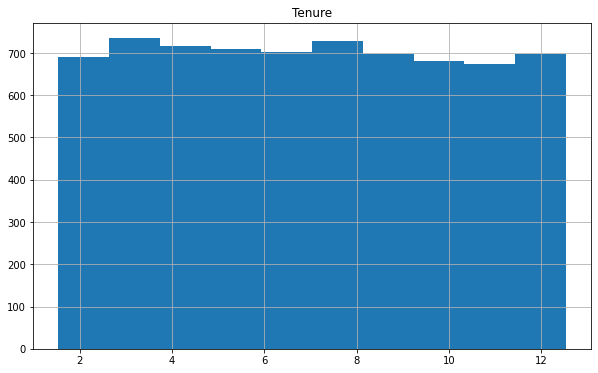

In [27]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["font.size"] = 10
hist1 = df.hist(column=['TotalCharges'])
hsit2 = df.hist(column=['MonthlyCharges'])
hsit3 = df.hist(column=['Tenure'])

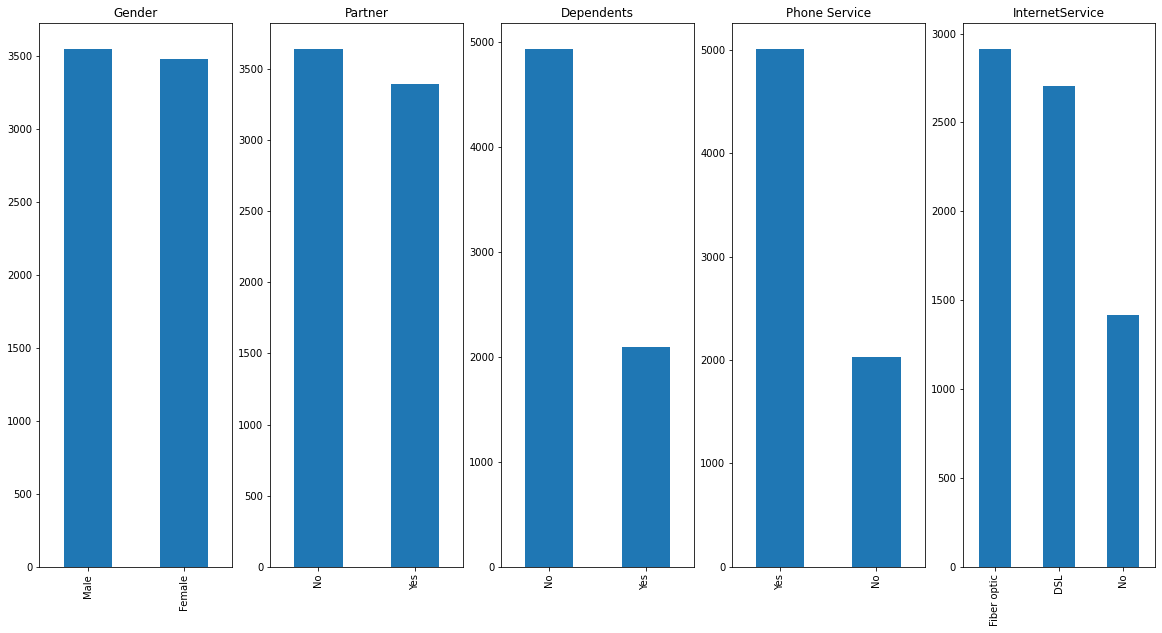

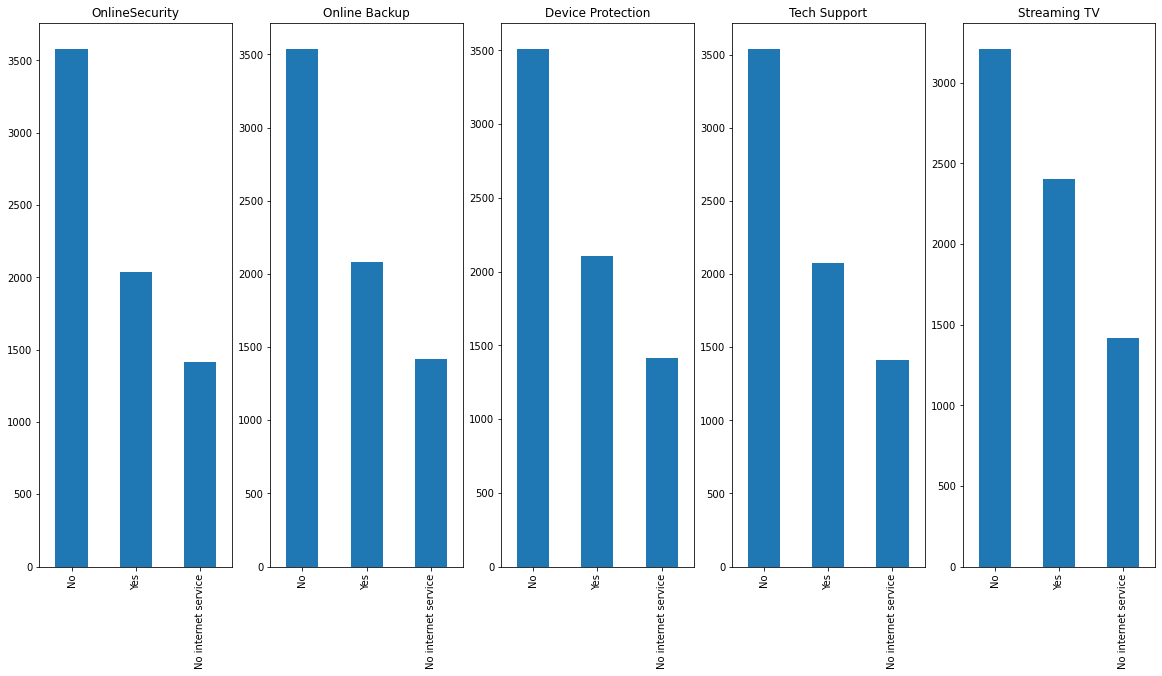

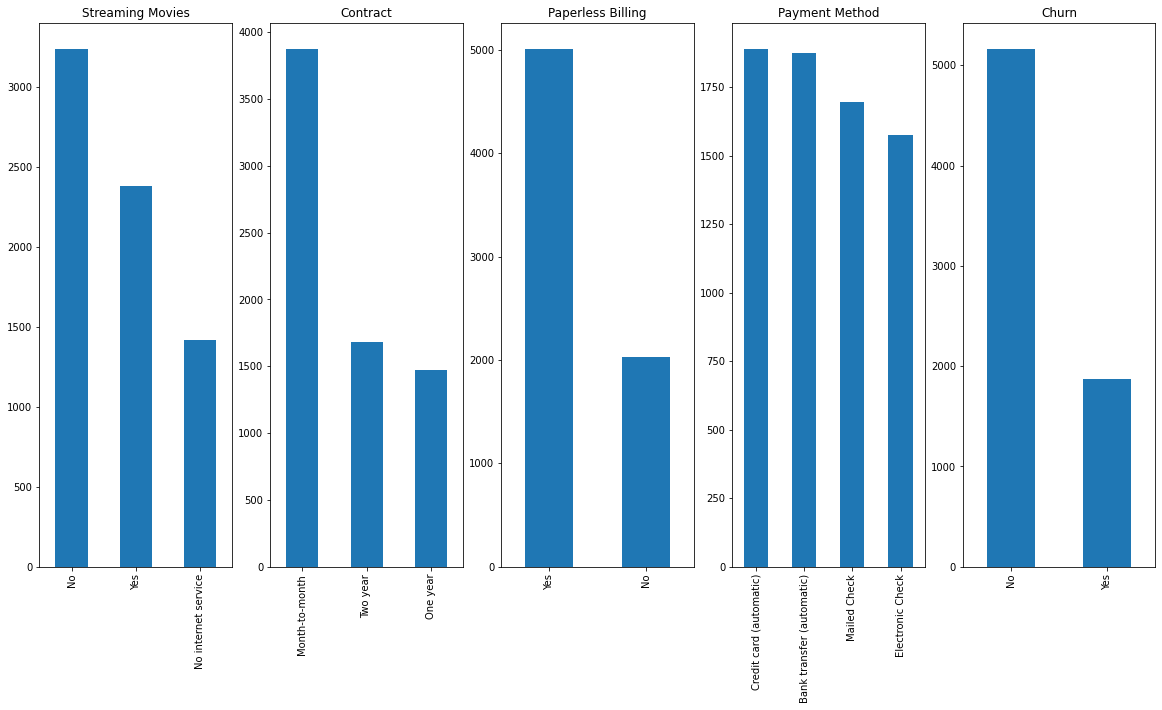

In [28]:
#FIRST ROW
plt.figure(figsize=(20,10))
plt.subplot(1,5,1)
fig = df['gender'].value_counts().plot.bar()
plt.title("Gender")

plt.subplot(1,5,2)
fig = df['Partner'].value_counts().plot.bar()
plt.title("Partner")


plt.subplot(1,5,3)
fig = df['Dependents'].value_counts().plot.bar()
plt.title("Dependents")

plt.subplot(1,5,4)
fig = df['PhoneService'].value_counts().plot.bar()
plt.title("Phone Service")

plt.subplot(1,5,5)
fig = df['InternetService'].value_counts().plot.bar()
plt.title("InternetService")
plt.show()


#SECOND ROW
plt.figure(figsize=(20,10))
plt.subplot(1,5,1)
fig = df['OnlineSecurity'].value_counts().plot.bar()
plt.title("OnlineSecurity")

plt.subplot(1,5,2)
fig = df['OnlineBackup'].value_counts().plot.bar()
plt.title("Online Backup")


plt.subplot(1,5,3)
fig = df['DeviceProtection'].value_counts().plot.bar()
plt.title("Device Protection")

plt.subplot(1,5,4)
fig = df['TechSupport'].value_counts().plot.bar()
plt.title("Tech Support")

plt.subplot(1,5,5)
fig = df['StreamingTV'].value_counts().plot.bar()
plt.title("Streaming TV")
plt.show()

#THIRD ROW
plt.figure(figsize=(20,10))
plt.subplot(1,5,1)
fig = df['StreamingMovies'].value_counts().plot.bar()
plt.title("Streaming Movies")

plt.subplot(1,5,2)
fig = df['Contract'].value_counts().plot.bar()
plt.title("Contract")

plt.subplot(1,5,3)
fig = df['PaperlessBilling'].value_counts().plot.bar()
plt.title("Paperless Billing")

plt.subplot(1,5,4)
fig = df['PaymentMethod'].value_counts().plot.bar()
plt.title("Payment Method")

plt.subplot(1,5,5)
fig = df['Churn'].value_counts().plot.bar()
plt.title("Churn")
plt.show()


*1.D **bold text**
After visualizing both continuous and categorical data, I was able to learn further about the data set.

-When looking at features which correlate to customer churn, I found "SeniorCitizen", "Partner", "Dependants", "Contract", "MonthlyCharges" and "TotalCharges" to be the most heavily correlated to churn.



### 2. Baseline Model to Predict Customer Churn

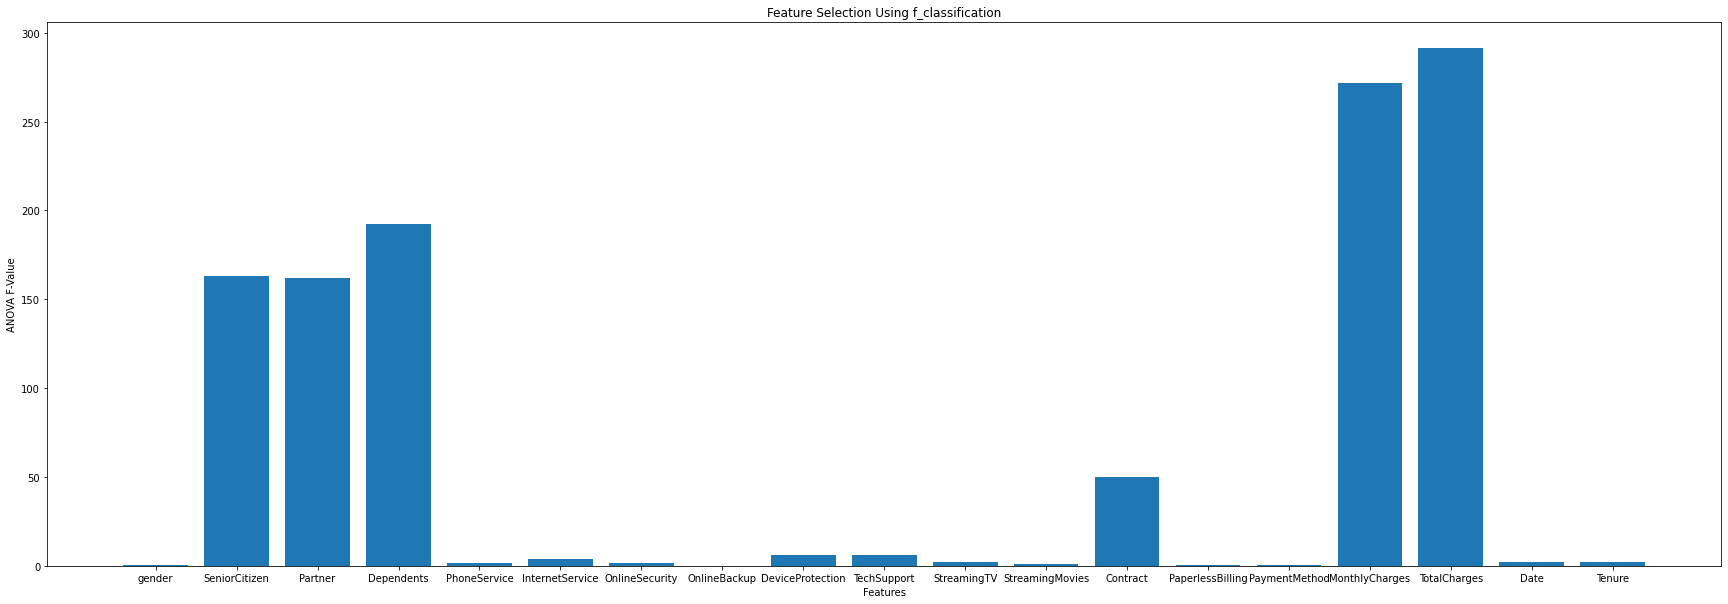

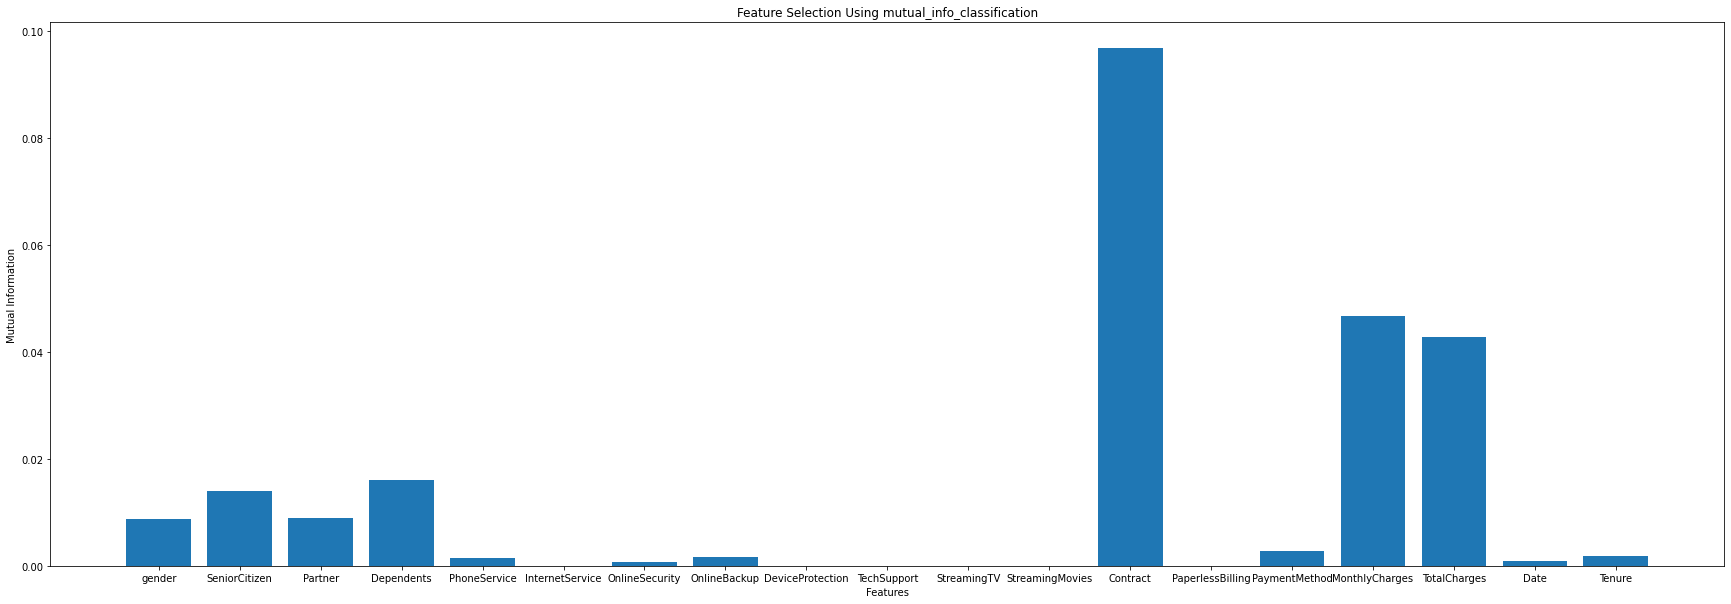

In [29]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif, chi2
X = dfConverted.drop('Churn', axis=1)
y = dfConverted['Churn']

#Performing K best feature selection using the f_regression metric
X_new = SelectKBest(f_classif, k=6).fit(X, y)

#PLOTIING RESULTS
fig = plt.figure(figsize=(30,10))
plt.bar(X.columns, X_new.scores_)
plt.xlabel("Features")
plt.ylabel("ANOVA F-Value")
plt.title("Feature Selection Using f_classification")
plt.show()


#Performing K best feature selection using the mutual_info_regression metric
X_new2 = SelectKBest(mutual_info_classif, k=6).fit(X, y)
#PLOTTING RESULTS
fig = plt.figure(figsize=(30,10))
plt.bar(X.columns, X_new2.scores_)
plt.xlabel("Features")
plt.ylabel("Mutual Information")
plt.title("Feature Selection Using mutual_info_classification")
plt.show()

**2.b**
In this problem, I am solving the task of supervised classification. I have been given a list of features which are primarily categorical with the goal of predicting whether a customer will churn based on those features. My classification task consists of predicting a binary target value so I chose to use Logistic Regression as my baseline model.

**2.c**
The evaluation metrtic I chose to use to determine the performance of my model is accuracy. This is again due to the fact that my task is to predaict a binary target so all i care about is whether i predicted 100% correctly or not. Error is not relevant for this problem as there is only 1 type of error.


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Removing irrelevant features
trimmedX = X.drop('gender', axis=1)
trimmedX = trimmedX.drop('PhoneService', axis=1)
trimmedX = trimmedX.drop('InternetService', axis=1)
trimmedX = trimmedX.drop('OnlineSecurity', axis=1)
trimmedX = trimmedX.drop('DeviceProtection', axis=1)
trimmedX = trimmedX.drop('TechSupport', axis=1)
trimmedX = trimmedX.drop('StreamingTV', axis=1)
trimmedX = trimmedX.drop('StreamingMovies', axis=1)
trimmedX = trimmedX.drop('PaperlessBilling', axis=1)
trimmedX = trimmedX.drop('PaymentMethod', axis=1)
trimmedX = trimmedX.drop('Date', axis=1)
trimmedX = trimmedX.drop('Tenure', axis=1)

#Splitting data into 40% training, 30% validation and 30% testing
xTrain, xTempTest, yTrain, yTempTest = train_test_split(trimmedX, y, train_size=0.4)
xValidation, xTest, yValidation, yTest = train_test_split(xTempTest, yTempTest, train_size=0.5)

#Creating logistic regression model
logRegression = LogisticRegression(max_iter=300)



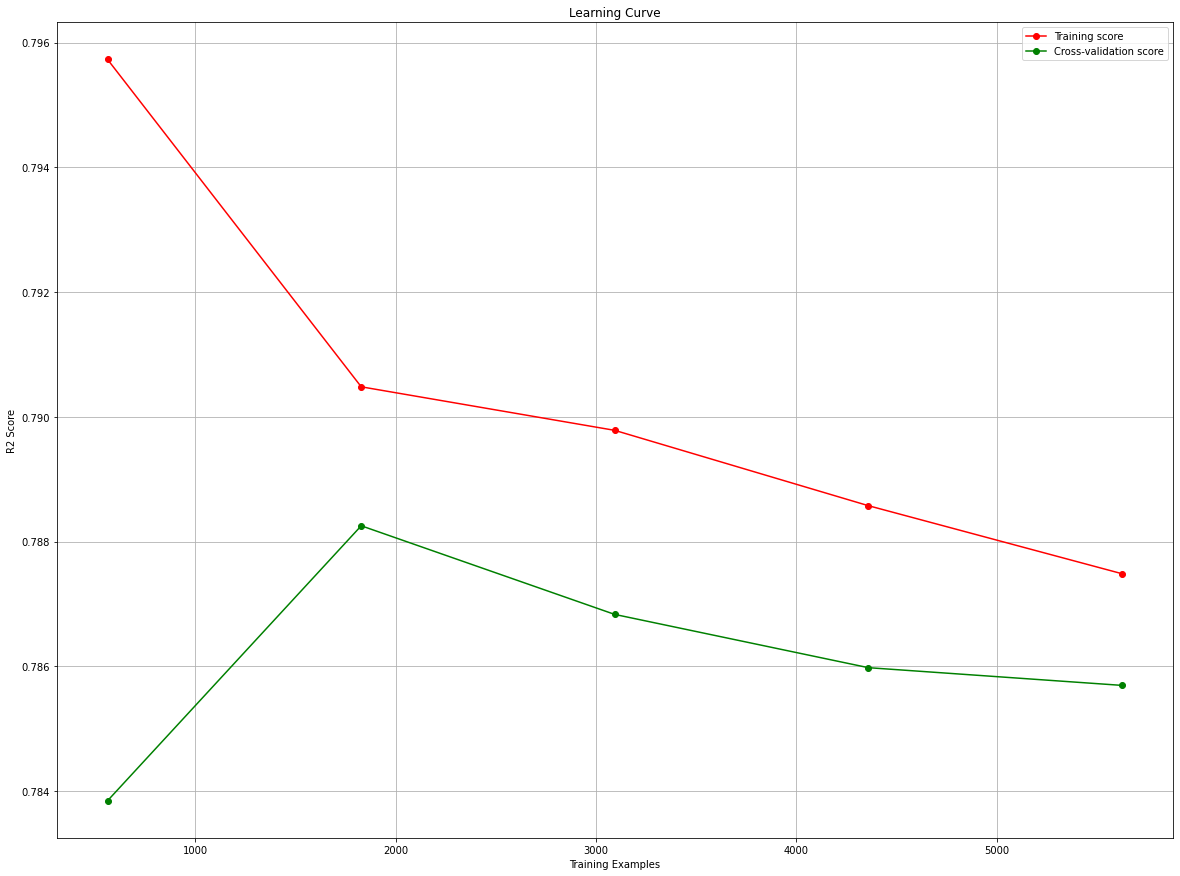

In [44]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

#PLOTTING LEARNING CURVE(taken from turorial 3)
train_sizes, train_scores, test_scores= learning_curve(logRegression, trimmedX, y, cv=5, return_times=False, shuffle=True,scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot learning curve
fig, axes = plt.subplots(figsize=(20, 15))
axes.grid()
axes.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
axes.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
axes.legend(loc="best")
plt.xlabel("Training Examples")
plt.ylabel("R2 Score")
plt.title("Learning Curve")
plt.show()

As seen from the learning curve above, the logistic regression model seems to overfit the data when trained with around 2000 training examples or less. I am able to avoid overfitting by ensuring that I train my model using more than 2000 sample examples.
The results from my baseline model arent terrible but can certainly be imporved upon.

### 3. Neural Network Model to Predict Customer Churn

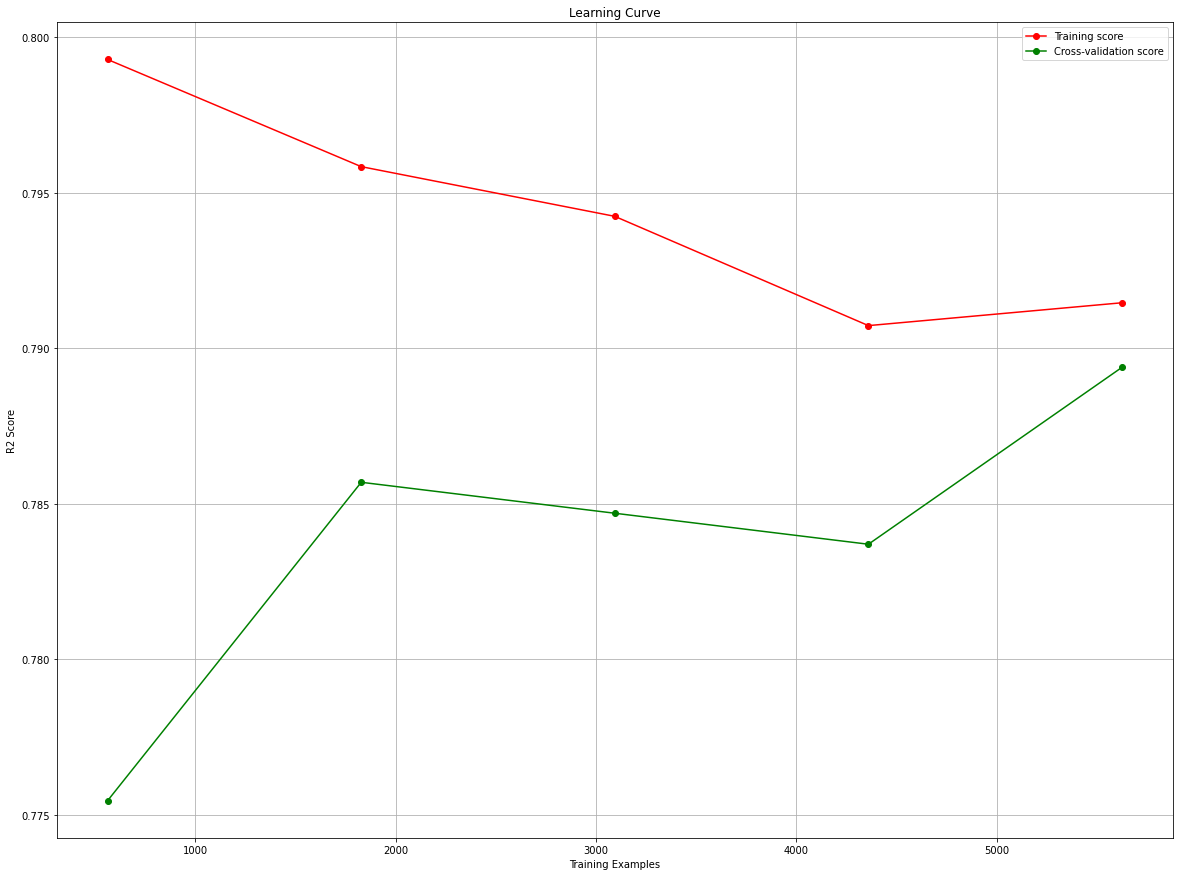

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#SCALING VALUES BEFORE BEING USED FOR NEURAL NETWORK
sc = StandardScaler()
scaler = sc.fit(trimmedX)
scaledX = scaler.transform(trimmedX)

neuralNetwork = MLPClassifier(hidden_layer_sizes=(8,), max_iter = 2000,activation = 'relu', solver = 'adam')

#PLOTTING LEARNING CURVE(taken from turorial 3)
train_sizes, train_scores, test_scores= learning_curve(neuralNetwork, scaledX, y, cv=5, return_times=False, shuffle=True,scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot learning curve
fig, axes = plt.subplots(figsize=(20, 15))
axes.grid()
axes.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
axes.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
axes.legend(loc="best")
plt.xlabel("Training Examples")
plt.ylabel("R2 Score")
plt.title("Learning Curve")
plt.show()

As seen from the learning curve above, the Neural Network Model seems to be much more consistent than the logistic regression model. We are able to avoid overfitting with the neural network model by using 2000 traing samples or more. Overall, the model seems to be predicting churn at a slightly higher overall accuracy than logistic regression.

Logistic Regression Accuracy: 0.79
Neural Network Accuracy: 0.77


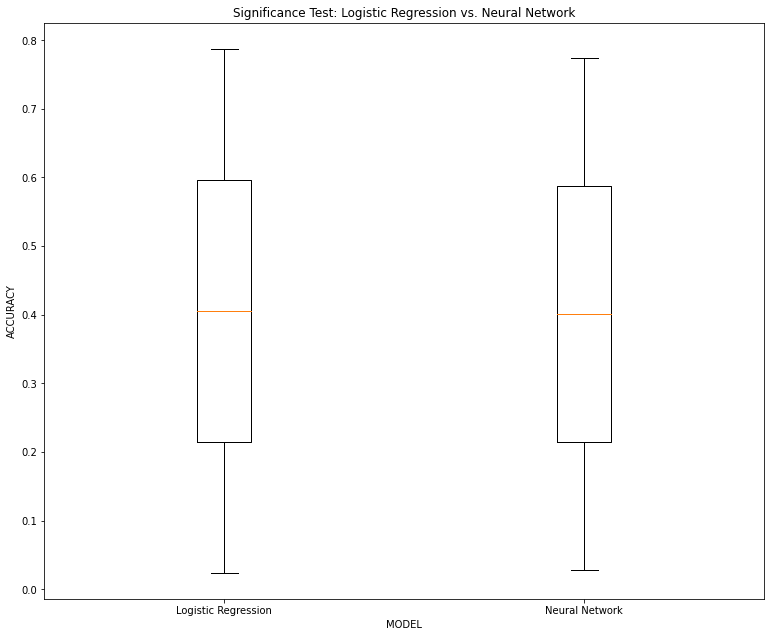

In [33]:
from sklearn.metrics import accuracy_score
from sklearn import model_selection


#logRegression = logRegression.fit(xTrain, yTrain)
#neuralNetwork = neuralNetwork.fit(xTrain, yTrain)

#https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
kfold = model_selection.KFold(n_splits=10)
logRegScores = model_selection.cross_val_score(logRegression, trimmedX, y, cv=kfold, scoring='accuracy')
neuralScores = model_selection.cross_val_score(neuralNetwork, trimmedX, y, cv=kfold, scoring='accuracy')
print("Logistic Regression Accuracy: {:.2f}".format(logRegScores.mean()))
print("Neural Network Accuracy: {:.2f}".format(neuralScores.mean()))

#https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
linRegData = [logRegScores.mean(), np.std(logRegScores)]
neuralData = [neuralScores.mean(), np.std(neuralScores)]
data = [linRegData, neuralData]
boxPlot = ax.boxplot(data)
plt.xticks([1,2], ['Logistic Regression', 'Neural Network'])
plt.title("Significance Test: Logistic Regression vs. Neural Network")
plt.xlabel("MODEL")
plt.ylabel("ACCURACY")
plt.show()



### 4. Concept Drift Detection

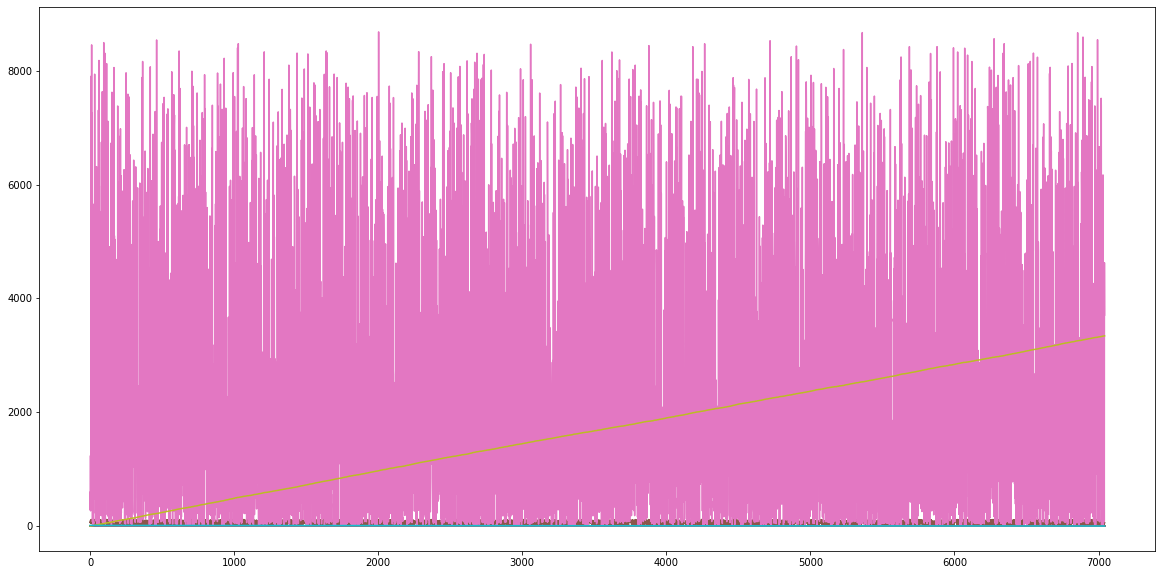

In [34]:

from skmultiflow.drift_detection import ADWIN

plt.figure(figsize=(20, 10))
plt.plot(dfConverted)

adwin = ADWIN()

for i in range(dfConverted['Churn'].size):
    # add a new point to adwin object
    if(i in dfConverted.index):
      adwin.add_element(dfConverted['Churn'][i])
    
    # if adwin detects change, print at what point in the stream 
    # the change was detected
    if adwin.detected_change():
        print('Change detected at index {}'.format(i))

According to the above graph, there does not seem to be a concept drift detected within the dataframe.

### References:

1. https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed <a id='3'></a>